In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [35]:
# RETURNS COLUMN INDEX from CASES/DEATHS-ONLY DF - WIDE
def get_first_inf_idx(df):
    first_inf_idx = 0
    count = 0
    for col in df.columns:
        if df[col].sum() > 0:
            first_inf_idx = count
            break
        count += 1
    return first_inf_idx

# RETURNS COLUMN INDEX from CASES/DEATHS-ONLY DF - LONG TABLE
def get_first_inf_idx_long(df, col):
    return df[col].ne(0).idxmax()
    

### 1) Utilize Linear and Non-Linear (polynomial) regression models to compare trends for a single state and its counties. Start your data from the first day of infections. X-Axis, number of days since the first case, Y-Axis number of new cases and deaths. Calcluate error using RMSE.

In [33]:
state = 'NC'

# GET SINGLE STATE
cases = pd.read_csv('data/normalized/new_cases_normalized.csv')
cases = cases.drop(cases.columns[0], axis=1)
cases_info = cases.iloc[:,:4]
state_cases = cases.loc[cases["State"] == state]
state_cases_only = state_cases.iloc[:,4:]

#DROP COLUMNS BEFORE FIRST INFECTION
#first_infection = get_first_inf_idx(state_cases_only)
#state_cases_only = state_cases_only.iloc[:,first_infection:]
cases = pd.merge(cases_info, state_cases_only,  left_index=True, right_index=True)

#TRANSPOSE
cases_t = cases.drop(cases.columns[[0,2,3]], axis=1).transpose()
cases_t.columns = cases_t.iloc[0]
cases_t = cases_t.iloc[1:]
cases_t = cases_t = cases_t.drop(cases_t.columns[0], axis=1)
cases_t.reset_index(inplace=True)
cases_t = cases_t.rename(columns={"index": "Date"})


# ADD UNDERSCORES TO COLUMN NAMES, AND 'DAYS SINCE 1st INFECTION' COL
cases_t.columns = cases_t.columns.str.replace(' ','_')
cases_t['Day'] = cases_t.index

In [38]:
counties = ['Mecklenburg_County', 'Wake_County', 'Guilford_County','Durham_County','Forsyth_County']

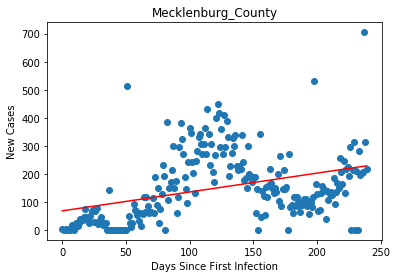

In [101]:
index = get_first_inf_idx_long(cases_t, counties[0])
county = cases_t.iloc[index:][counties[0]]
county = county.reset_index(drop=True)

# MODEL
X = county.index.to_numpy()
Y = county.to_numpy()
X = np.array(X, dtype=float)
Y = np.array(Y, dtype=float)
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
b0 = model.params[0]
b1 = model.params[1]
#y1 = b0 + county.index[0]*b1
#y2 = b0 + county.index[-1]*b1



plt.xlabel("Days Since First Infection")
plt.ylabel("New Cases")
plt.title(counties[0])
plt.scatter(x=county.index, y=county)
plt.plot(X, X*b1 + b0, color = 'r')
plt.show()

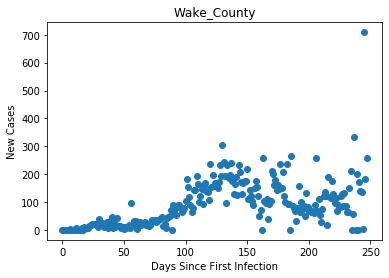

In [55]:
index = get_first_inf_idx_long(cases_t, counties[1])
county = cases_t.iloc[index:][counties[1]]
county = county.reset_index(drop=True)
plt.xlabel("Days Since First Infection")
plt.ylabel("New Cases")
plt.title(counties[1])
plt.scatter(x=county.index, y=county)
plt.show()

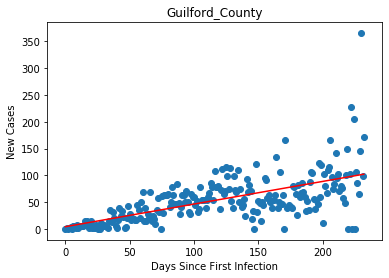

In [99]:
index = get_first_inf_idx_long(cases_t, counties[2])
county = cases_t.iloc[index:][counties[2]]
county = county.reset_index(drop=True)

# MODEL
X = county.index.to_numpy()
Y = county.to_numpy()
X = np.array(X, dtype=float)
Y = np.array(Y, dtype=float)
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
b0 = model.params[0]
b1 = model.params[1]
y1 = b0 + county.index[0]*b1
y2 = b0 + county.index[-1]*b1

plt.xlabel("Days Since First Infection")
plt.ylabel("New Cases")
plt.title(counties[2])
plt.plot([county.index[0], county.index[-1]], [y1, y2], color = 'r')
plt.scatter(x=county.index, y=county)
plt.show()

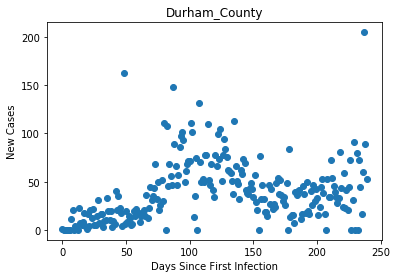

In [57]:
index = get_first_inf_idx_long(cases_t, counties[3])
county = cases_t.iloc[index:][counties[3]]
county = county.reset_index(drop=True)
plt.xlabel("Days Since First Infection")
plt.ylabel("New Cases")
plt.title(counties[3])
plt.scatter(x=county.index, y=county)
plt.show()

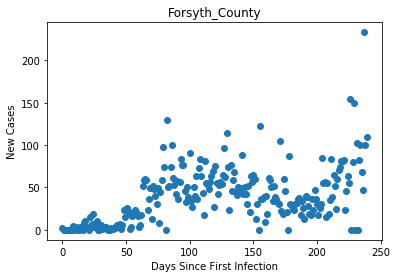

In [58]:
index = get_first_inf_idx_long(cases_t, counties[4])
county = cases_t.iloc[index:][counties[4]]
county = county.reset_index(drop=True)
plt.xlabel("Days Since First Infection")
plt.ylabel("New Cases")
plt.title(counties[4])
plt.scatter(x=county.index, y=county)
plt.show()

In [34]:
X = cases_t['Day'].to_numpy()
Y = cases_t['Wake_County'].to_numpy()
X = np.array(X, dtype=float)
Y = np.array(Y, dtype=float)
Y = sm.add_constant(Y)
model = sm.OLS(X,Y).fit()
model.summary()
model.params

array([95.24401076,  0.61603391])

### Hospital Data

In [ ]:
hospital = pd.read_csv('../../data/Hospitals/hospital_merged_covid.csv')
hospital = hospital[['County Name', 'COUNTY_NAME', 'State', 'BED_UTILIZATION','NUM_LICENSED_BEDS',\
                     'NUM_STAFFED_BEDS','NUM_ICU_BEDS','ADULT_ICU_BEDS','Potential_Increase_In_Bed_Capac']]
hospital = hospital[hospital['County Name'].notna()]
hospital